In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
#load data
data = pd.read_csv("..\..\Data\Minute\\2010-2014-SANDP-500.txt")

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\Data\\Minute\\dje_MinuteToDay.csv'

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,1262626320,1122.87,1123.80,1122.87,1123.80
1,1262626380,1123.95,1124.18,1123.95,1124.18
2,1262626440,1124.27,1124.27,1124.07,1124.07
3,1262626500,1124.17,1124.26,1124.17,1124.26
4,1262626560,1124.63,1124.63,1124.63,1124.63


In [37]:
#transform data
import datetime
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date, unit='s')
data = data.sort_values(by=["Date"])
data.Close = data.Close.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)

In [38]:
special_data = pd.DataFrame(data)

In [39]:
#change indexes
special_data.set_index('Date', inplace=True)

In [40]:
data.head()

,Date,Open,High,Low,Close,Timestamp
0,2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,2010-01-04 17:32:00
1,2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,2010-01-04 17:33:00
2,2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,2010-01-04 17:34:00
3,2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,2010-01-04 17:35:00
4,2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,2010-01-04 17:36:00


In [41]:
special_data.head(10)

,Open,High,Low,Close,Timestamp
Date,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,2010-01-04 17:32:00
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,2010-01-04 17:33:00
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,2010-01-04 17:34:00
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,2010-01-04 17:35:00
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,2010-01-04 17:36:00
2010-01-04 17:37:00,1126.30,1126.30,1126.18,1126.29,2010-01-04 17:37:00
2010-01-04 17:38:00,1126.50,1126.75,1126.50,1126.75,2010-01-04 17:38:00
2010-01-04 17:39:00,1126.69,1126.74,1126.68,1126.68,2010-01-04 17:39:00
2010-01-04 17:40:00,1126.54,1126.64,1126.54,1126.64,2010-01-04 17:40:00


In [9]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

,Open,High,Low,Close,Timestamp,new_index,new_date
Date,,,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,1262626320,1123.80,1123.80
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,1262626380,1124.18,1124.18
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,1262626440,1124.07,1124.07
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,1262626500,1124.26,1124.26
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,1262626560,1124.63,1124.63


In [10]:
#change indexes
special_data.set_index('new_date', inplace=True)

In [42]:
special_data.head(20)

,Open,High,Low,Close,Timestamp
Date,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,2010-01-04 17:32:00
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,2010-01-04 17:33:00
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,2010-01-04 17:34:00
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,2010-01-04 17:35:00
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,2010-01-04 17:36:00
2010-01-04 17:37:00,1126.30,1126.30,1126.18,1126.29,2010-01-04 17:37:00
2010-01-04 17:38:00,1126.50,1126.75,1126.50,1126.75,2010-01-04 17:38:00
2010-01-04 17:39:00,1126.69,1126.74,1126.68,1126.68,2010-01-04 17:39:00
2010-01-04 17:40:00,1126.54,1126.64,1126.54,1126.64,2010-01-04 17:40:00


In [43]:
print(special_data.index.inferred_freq)

None


In [44]:
special_data.set_index('new_index', inplace = True)

KeyError: "None of ['new_index'] are in the columns"

In [45]:
special_data.head(20)

,Open,High,Low,Close,Timestamp
Date,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,2010-01-04 17:32:00
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,2010-01-04 17:33:00
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,2010-01-04 17:34:00
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,2010-01-04 17:35:00
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,2010-01-04 17:36:00
2010-01-04 17:37:00,1126.30,1126.30,1126.18,1126.29,2010-01-04 17:37:00
2010-01-04 17:38:00,1126.50,1126.75,1126.50,1126.75,2010-01-04 17:38:00
2010-01-04 17:39:00,1126.69,1126.74,1126.68,1126.68,2010-01-04 17:39:00
2010-01-04 17:40:00,1126.54,1126.64,1126.54,1126.64,2010-01-04 17:40:00


In [46]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

In [47]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

ValueError: No frequency information was provided with date index and no frequency could be inferred.

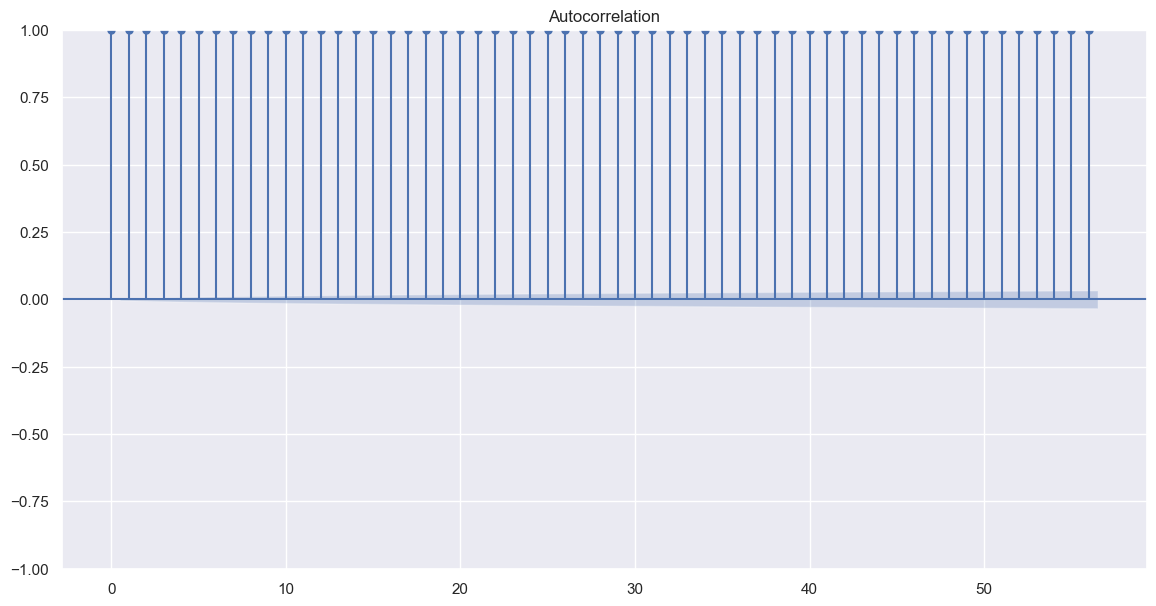

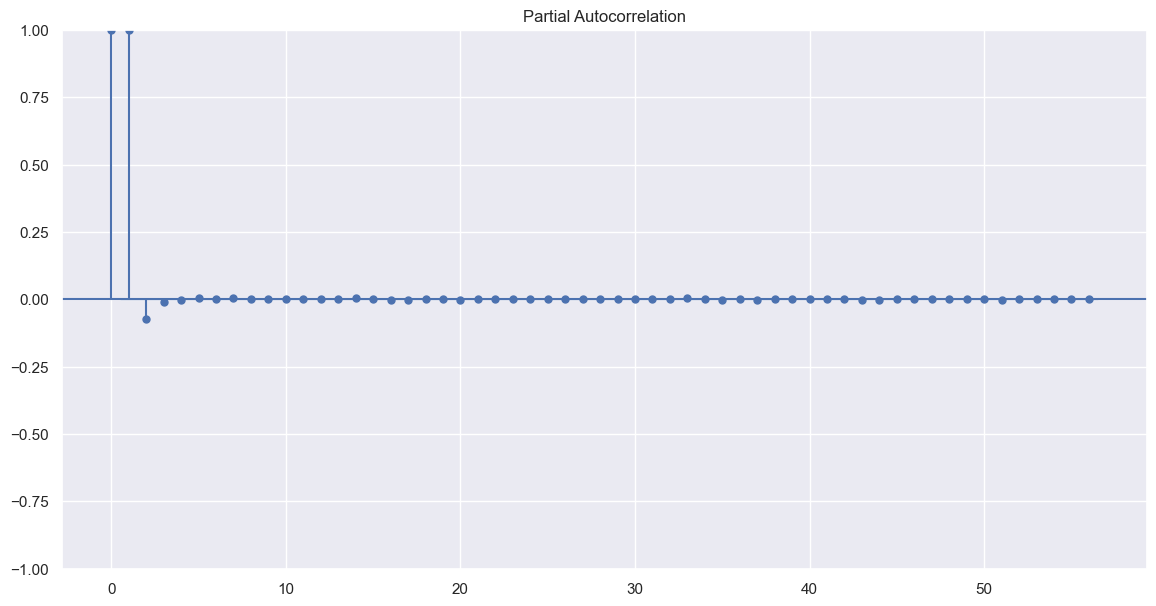

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [48]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

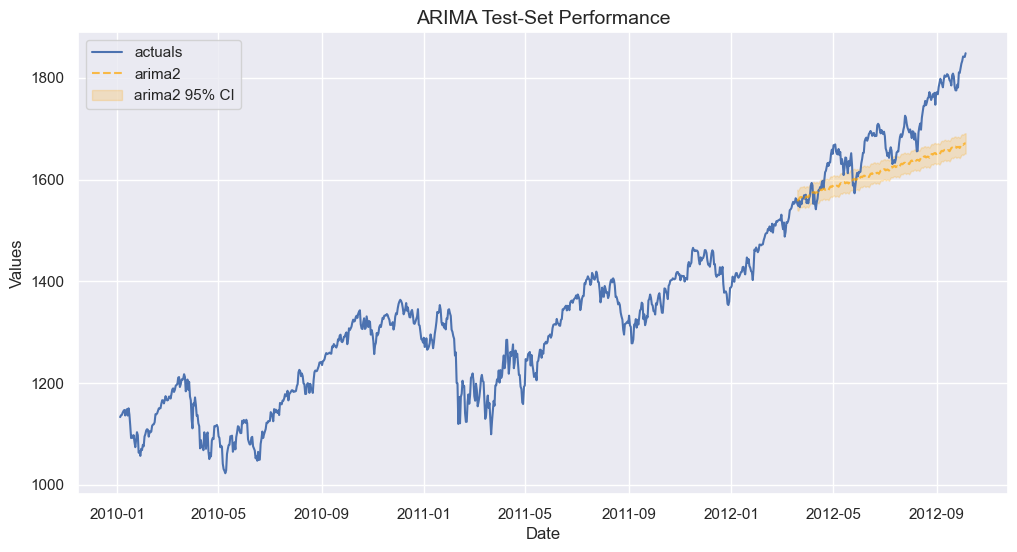

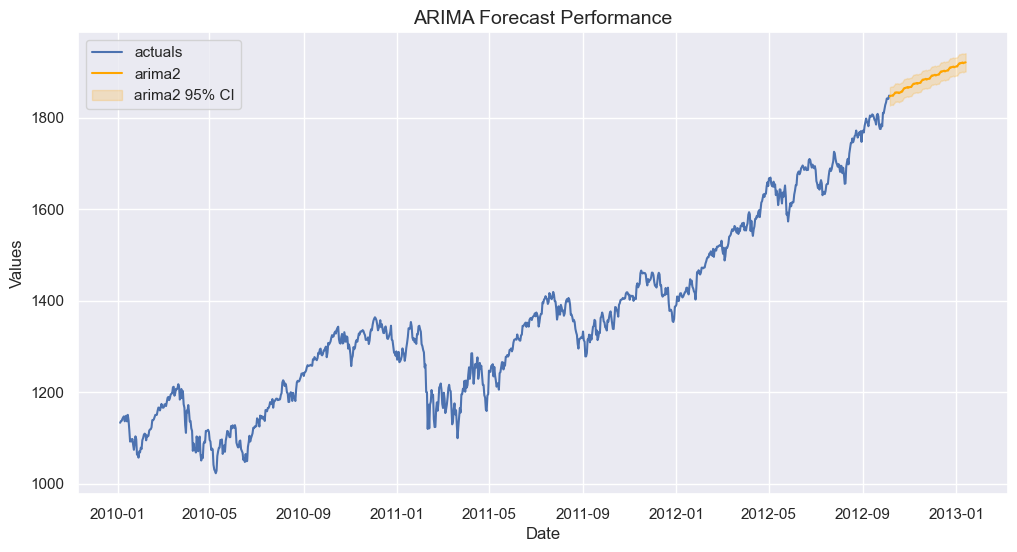

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                 1006
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -4013.507
Date:                          Sun, 13 Nov 2022   AIC                           8041.014
Time:                                  12:01:58   BIC                           8075.319
Sample:                                       0   HQIC                          8054.056
                                         - 1006                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8060      0.101     -7.991      0.000      -1.004      -0.608
ar.L2          0.0186      0.032      0.589      0.556      -0.043       0.080
ma.L1          0.7569      0.097      7.780      0.000       0.566       0.948
ar.S.L12      -0.0060      0.029     -0.204      0.838      -0.064       0.052
ar.S.L24       0.0440      0.033      1.345      0.179      -0.020       0.108
ma.S.L12      -0.9911      0.042    -23.693      0.000      -1.073      -0.909
sigma2       181.3901      8.487     21.372      0.000     164.755     198.025
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               253.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.33
Prob(H) (two-sided):                  0.39   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [51]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [52]:
adf_test(special_data['Close'])

1. ADF :  0.17782513452438217
2. P-Value :  0.9709900862104471
3. Num Of Lags :  92
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 392857
5. Critical Values :
	 1% :  -3.4303666456057256
	 5% :  -2.8615473571573826
	 10% :  -2.566773915946897


In [53]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               392950
Model:               SARIMAX(1, 1, 5)   Log Likelihood             -292527.828
Date:                Sat, 14 Oct 2023   AIC                         585071.657
Time:                        23:44:43   BIC                         585158.708
Sample:                             0   HQIC                        585096.550
                             - 392950                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.668      0.095   -3.64e-05       0.000
ar.L1          0.8842      0.015     59.474      0.000       0.855       0.913
ma.L1         -0.6594      0.015    -44.262      0.000      -0.689      -0.630
ma.L2         -0.1496      0.003    -45.638      0.000      -0.156      -0.143
ma.L3         -0.0292      0.001    -25.951      0.000      -0.031      -0.027
ma.L4         -0.0221      0.001    -38.651      0.000      -0.023      -0.021
ma.L5          0.0037      0.001      5.942      0.000       0.002       0.005
sigma2         0.2595   6.53e-05   3973.489      0.000       0.259       0.260
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         483279014.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       174.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
data_len = len(special_data)

In [55]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [56]:
train_data = special_data.iloc[:int(train_len)]

In [57]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [58]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Close'],order=(1,1,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:               275065
Model:                 ARIMA(1, 1, 5)   Log Likelihood             -228856.936
Date:                Sat, 14 Oct 2023   AIC                         457727.873
Time:                        23:46:31   BIC                         457801.546
Sample:                             0   HQIC                        457749.261
                             - 275065                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6981      0.051     13.704      0.000       0.598       0.798
ma.L1         -0.5033      0.051     -9.878      0.000      -0.603      -0.403
ma.L2         -0.0896      0.010     -9.049      0.000      -0.109      -0.070
ma.L3         -0.0212      0.003     -7.825      0.000      -0.026      -0.016
ma.L4         -0.0186      0.001    -27.437      0.000      -0.020      -0.017
ma.L5          0.0015      0.001      1.867      0.062   -7.65e-05       0.003
sigma2         0.3092   9.54e-05   3240.127      0.000       0.309       0.309
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         313185217.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                       168.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start= test_data.index[0]
end= test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(range(0, test_len - 1), test_data['Close'])
plt.plot(range(0, test_len - 1), pred)
plt.xlabel('Index')
plt.ylabel('Price')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [63]:
test_data.index[0]

Timestamp('2012-10-22 17:38:00')

In [35]:
start

Float64Index([1432.89, 1432.48,  1431.5,  1431.7, 1431.97, 1431.63, 1431.16,
              1430.62, 1430.04,  1430.0,
              ...
               1848.8, 1848.91, 1848.23, 1846.77, 1847.33, 1848.35, 1848.36,
              1848.36, 1848.36, 1848.36],
             dtype='float64', name='new_index', length=117885)

In [32]:
end

1848.36

In [36]:
test_data

,Open,High,Low,Close,Timestamp
new_index,,,,,
1432.89,1433.32,1433.32,1432.89,1432.89,1350927480
1432.48,1432.89,1432.89,1432.48,1432.48,1350927540
1431.50,1432.45,1432.45,1431.50,1431.50,1350927600
1431.70,1431.41,1431.70,1431.35,1431.70,1350927660
1431.97,1431.74,1432.01,1431.74,1431.97,1350927720
...,...,...,...,...,...
1848.35,1847.43,1848.35,1847.43,1848.35,1388538060
1848.36,1848.35,1848.36,1848.35,1848.36,1388538120
1848.36,1848.35,1848.36,1848.35,1848.36,1388538180


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=6516.582, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6517.281, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6517.793, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6518.058, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6516.458, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6519.209, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6519.214, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6521.052, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6515.901, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=6517.801, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6519.641, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=6516.370, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6510.960, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=6512.934, Time=0.41 sec
 ARIMA(1,1,1)(0,0,1

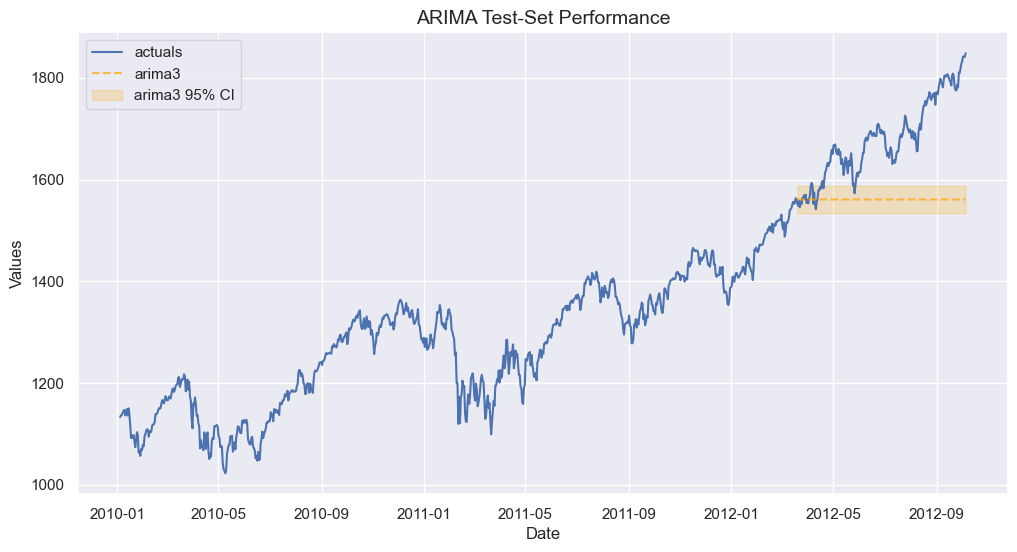

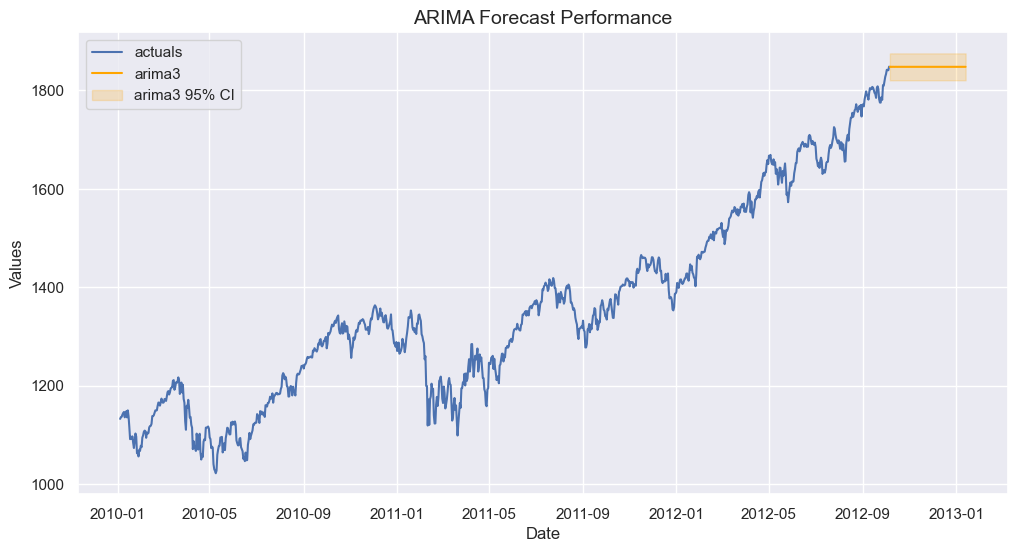

In [36]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [37]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4035.755
Date:                Sun, 13 Nov 2022   AIC                           8077.510
Time:                        12:08:16   BIC                           8092.248
Sample:                             0   HQIC                          8083.110
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8444      0.066    -12.706      0.000      -0.975      -0.714
ma.L1          0.7846      0.078     10.119      0.000       0.633       0.937
sigma2       180.0879      5.647     31.892      0.000     169.021     191.155
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               284.21
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.40
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

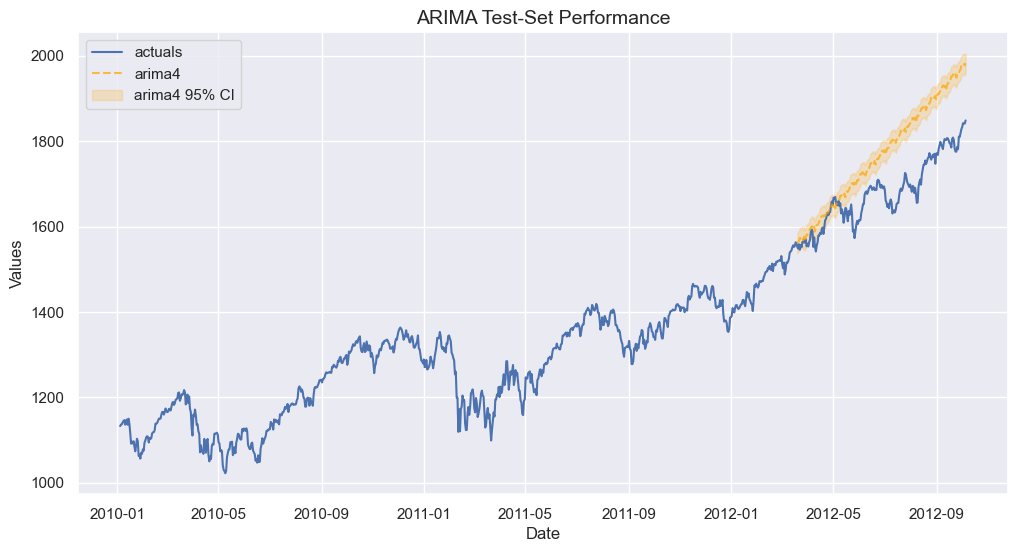

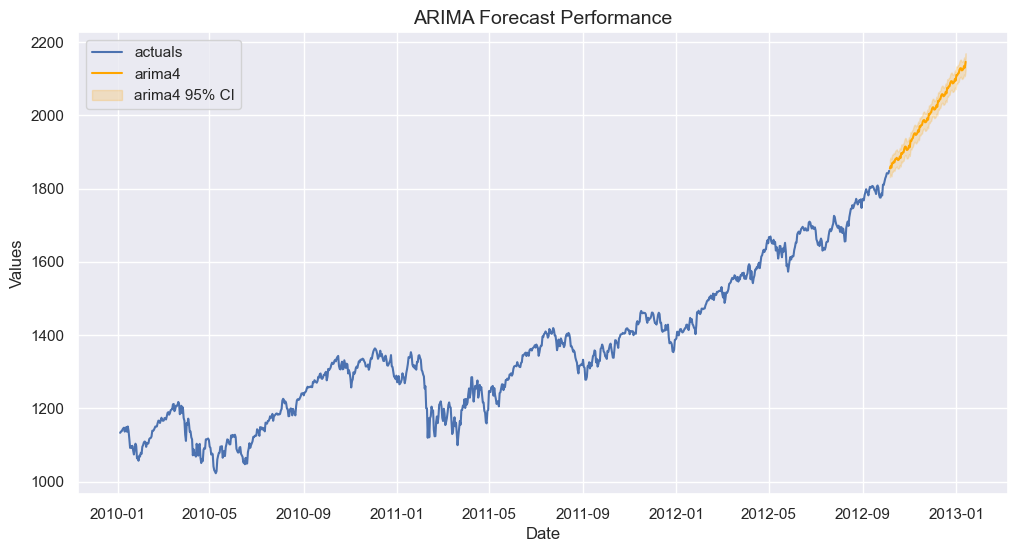

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1006
Model:             ARIMA(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -4128.370
Date:                           Sun, 13 Nov 2022   AIC                           8266.740
Time:                                   12:23:30   BIC                           8291.244
Sample:                                        0   HQIC                          8276.057
                                          - 1006                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8405      0.072    -11.646      0.000      -0.982      -0.699
ma.L1          0.7752      0.084      9.254      0.000       0.611       0.939
ar.S.L12      -0.6880      0.028    -24.779      0.000      -0.742      -0.634
ar.S.L24      -0.3141      0.027    -11.620      0.000      -0.367      -0.261
sigma2       237.6471      7.673     30.973      0.000     222.609     252.685
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               227.13
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.25
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [39]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [40]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.009163,0.037620
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 0, 12)}",0.010164,0.053786
2,arima3,"{'order': (1, 1, 1), 'seasonal_order': (0, 0, 0, 12), 'trend': None}",0.008407,0.068865
3,arima1,{},0.117585,0.237339
